In [314]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

pd.options.display.max_columns = 200
plt.style.use('seaborn-whitegrid')

## Read IMF Exchange Rate Data 
- 1. [Create dataframe from cleaned data](#-1.Create-dataframe-from-cleaned-data)
- 2. [Create a dataset in which all currencies are expressed in relation to USDollar](#-2.Create-a-dataset-in-which-all-currencies-are-expressed-in-relation-to-USDollar)
- 3. [Plot select currencies](#-3.Plot-select-currencies)


### 1.Create dataframe from cleaned data

In [315]:
exchange_data_df = pd.read_csv('../data/IMF_DailyExchangeRates_2010To2023_AllCurrencies.csv')
exchange_data_df.shape

(3264, 52)

In [316]:
exchange_data_df.head(3)

,Date,ChineseYuan,Euro,JapaneseYen,UKPound,USDollar,AlgerianDinar,AustralianDollar,BahrainDinar,BotswanaPula,BrazilianReal,BruneiDollar,CanadianDollar,ChileanPeso,ColombianPeso,CzechKoruna,DanishKrone,HungarianForint,IcelandicKrona,IndianRupee,IndonesianRupiah,IranianRial,IsraeliNewShekel,KazakhstaniTenge,KoreanWon,KuwaitiDinar,LibyanDinar,MalaysianRinggit,MauritianRupee,MexicanPeso,NepaleseRupee,NewZealandDollar,NorwegianKrone,OmaniRial,PakistaniRupee,PeruvianSol,PhilippinePeso,PolishZloty,QatariRiyal,RussianRuble,SaudiArabianRiyal,SingaporeDollar,SouthAfricanRand,SriLankanRupee,SwedishKrona,SwissFranc,ThaiBaht,TrinidadianDollar,TunisianDinar,UAEDirham,UruguayanPeso,BolivarFuerte
0,2010-01-04,6.8281,0.694975,93.05,0.616409,1.0,NaN,1.114827,0.376,6.640106,1.7404,1.4038,1.0378,507.10,2044.23,18.275,5.1717,187.23,124.85,46.51,9330.0,10009.0,3.765,148.46,1167.6,0.2871,1.932367,3.4195,30.3606,12.9226,74.60,NaN,5.7190,0.3845,84.4322,NaN,NaN,2.8465,3.64,NaN,3.75,1.4038,7.315,114.4253,7.1425,1.0336,33.359,6.3574,NaN,3.6725,NaN,2.1446
1,2010-01-05,6.8278,0.692425,91.75,0.624454,1.0,NaN,1.094930,0.376,6.605020,1.7232,1.3969,1.0372,505.70,2021.21,18.164,5.1527,186.09,124.78,46.20,9308.0,9980.0,3.736,148.46,1156.2,0.2866,1.932367,3.3885,30.3474,12.8241,74.11,1.361656,5.6862,0.3845,84.6402,NaN,NaN,2.8264,3.64,NaN,3.75,1.3969,7.285,114.4404,7.0575,1.0307,33.278,6.3548,NaN,3.6725,NaN,2.1446
2,2010-01-06,6.8277,0.696864,91.60,0.625626,1.0,NaN,1.094331,0.376,6.648936,1.7219,1.3966,1.0334,504.22,1992.78,18.352,5.1852,187.30,125.29,46.12,9308.0,10000.0,3.740,148.40,1144.3,0.2869,1.932367,3.3875,30.3042,12.7489,73.88,1.361841,5.7059,0.3845,84.7199,NaN,NaN,2.8493,3.64,NaN,3.75,1.3966,7.335,114.3429,NaN,1.0335,33.156,6.3640,NaN,3.6725,NaN,2.1446


In [317]:
exchange_data_df.dtypes

Date                  object
ChineseYuan          float64
Euro                 float64
JapaneseYen          float64
UKPound              float64
USDollar             float64
AlgerianDinar        float64
AustralianDollar     float64
BahrainDinar         float64
BotswanaPula         float64
BrazilianReal        float64
BruneiDollar         float64
CanadianDollar       float64
ChileanPeso          float64
ColombianPeso        float64
CzechKoruna          float64
DanishKrone          float64
HungarianForint      float64
IcelandicKrona       float64
IndianRupee          float64
IndonesianRupiah     float64
IranianRial          float64
IsraeliNewShekel     float64
KazakhstaniTenge     float64
KoreanWon            float64
KuwaitiDinar         float64
LibyanDinar          float64
MalaysianRinggit     float64
MauritianRupee       float64
MexicanPeso          float64
NepaleseRupee        float64
NewZealandDollar     float64
NorwegianKrone       float64
OmaniRial            float64
PakistaniRupee

[GO BACK TO TOP][def]

[def]: #-Read-IMF-Exchange-Rate-Data

### 2.Create a dataset in which all currencies are expressed in relation to USDollar

In [318]:
exchange_data_df.index

RangeIndex(start=0, stop=3264, step=1)

In [319]:
to_usd_df = pd.DataFrame(index=exchange_data_df.index)

In [320]:
to_usd_df.index

RangeIndex(start=0, stop=3264, step=1)

In [321]:
exchange_data_df.columns

Index(['Date', 'ChineseYuan', 'Euro', 'JapaneseYen', 'UKPound', 'USDollar',
       'AlgerianDinar', 'AustralianDollar', 'BahrainDinar', 'BotswanaPula',
       'BrazilianReal', 'BruneiDollar', 'CanadianDollar', 'ChileanPeso',
       'ColombianPeso', 'CzechKoruna', 'DanishKrone', 'HungarianForint',
       'IcelandicKrona', 'IndianRupee', 'IndonesianRupiah', 'IranianRial',
       'IsraeliNewShekel', 'KazakhstaniTenge', 'KoreanWon', 'KuwaitiDinar',
       'LibyanDinar', 'MalaysianRinggit', 'MauritianRupee', 'MexicanPeso',
       'NepaleseRupee', 'NewZealandDollar', 'NorwegianKrone', 'OmaniRial',
       'PakistaniRupee', 'PeruvianSol', 'PhilippinePeso', 'PolishZloty',
       'QatariRiyal', 'RussianRuble', 'SaudiArabianRiyal', 'SingaporeDollar',
       'SouthAfricanRand', 'SriLankanRupee', 'SwedishKrona', 'SwissFranc',
       'ThaiBaht', 'TrinidadianDollar', 'TunisianDinar', 'UAEDirham',
       'UruguayanPeso', 'BolivarFuerte'],
      dtype='object')

In [323]:
for currency in exchange_data_df.columns:
    if currency == 'Date':
        continue
    exchange_rate_col = f'{currency}ToUSD'
    to_usd_df[exchange_rate_col] = 1 / exchange_data_df[currency]
to_usd_df.insert(0, 'Date', exchange_data_df['Date'])
to_usd_df.head()

,Date,ChineseYuanToUSD,EuroToUSD,JapaneseYenToUSD,UKPoundToUSD,USDollarToUSD,AlgerianDinarToUSD,AustralianDollarToUSD,BahrainDinarToUSD,BotswanaPulaToUSD,BrazilianRealToUSD,BruneiDollarToUSD,CanadianDollarToUSD,ChileanPesoToUSD,ColombianPesoToUSD,CzechKorunaToUSD,DanishKroneToUSD,HungarianForintToUSD,IcelandicKronaToUSD,IndianRupeeToUSD,IndonesianRupiahToUSD,IranianRialToUSD,IsraeliNewShekelToUSD,KazakhstaniTengeToUSD,KoreanWonToUSD,KuwaitiDinarToUSD,LibyanDinarToUSD,MalaysianRinggitToUSD,MauritianRupeeToUSD,MexicanPesoToUSD,NepaleseRupeeToUSD,NewZealandDollarToUSD,NorwegianKroneToUSD,OmaniRialToUSD,PakistaniRupeeToUSD,PeruvianSolToUSD,PhilippinePesoToUSD,PolishZlotyToUSD,QatariRiyalToUSD,RussianRubleToUSD,SaudiArabianRiyalToUSD,SingaporeDollarToUSD,SouthAfricanRandToUSD,SriLankanRupeeToUSD,SwedishKronaToUSD,SwissFrancToUSD,ThaiBahtToUSD,TrinidadianDollarToUSD,TunisianDinarToUSD,UAEDirhamToUSD,UruguayanPesoToUSD,BolivarFuerteToUSD
0,2010-01-04,0.146454,1.4389,0.010747,1.6223,1.0,NaN,0.8970,2.659574,0.1506,0.574581,0.712352,0.963577,0.001972,0.000489,0.054720,0.193360,0.005341,0.008010,0.021501,0.000107,0.0001,0.265604,0.006736,0.000856,3.483107,0.5175,0.292440,0.032937,0.077384,0.013405,NaN,0.174856,2.60078,0.011844,NaN,NaN,0.351309,0.274725,NaN,0.266667,0.712352,0.136705,0.008739,0.140007,0.967492,0.029977,0.157297,NaN,0.272294,NaN,0.466287
1,2010-01-05,0.146460,1.4442,0.010899,1.6014,1.0,NaN,0.9133,2.659574,0.1514,0.580316,0.715871,0.964134,0.001977,0.000495,0.055054,0.194073,0.005374,0.008014,0.021645,0.000107,0.0001,0.267666,0.006736,0.000865,3.489184,0.5175,0.295116,0.032952,0.077978,0.013493,0.7344,0.175864,2.60078,0.011815,NaN,NaN,0.353807,0.274725,NaN,0.266667,0.715871,0.137268,0.008738,0.141693,0.970214,0.030050,0.157361,NaN,0.272294,NaN,0.466287
2,2010-01-06,0.146462,1.4350,0.010917,1.5984,1.0,NaN,0.9138,2.659574,0.1504,0.580754,0.716025,0.967680,0.001983,0.000502,0.054490,0.192857,0.005339,0.007981,0.021683,0.000107,0.0001,0.267380,0.006739,0.000874,3.485535,0.5175,0.295203,0.032999,0.078438,0.013535,0.7343,0.175257,2.60078,0.011804,NaN,NaN,0.350963,0.274725,NaN,0.266667,0.716025,0.136333,0.008746,NaN,0.967586,0.030160,0.157134,NaN,0.272294,NaN,0.466287
3,2010-01-07,0.146464,1.4304,0.010846,1.5912,1.0,NaN,0.9225,2.659574,0.1494,0.577067,0.717257,0.966090,0.002008,0.000507,0.054242,0.192230,0.005329,0.007966,0.021801,0.000108,0.0001,0.268312,0.006747,0.000879,3.487967,0.5175,0.296692,0.033110,0.078342,0.013587,0.7378,0.174480,2.60078,0.011795,NaN,NaN,0.349272,0.274725,NaN,0.266667,0.717257,0.135227,0.008747,0.140598,0.966184,0.030157,0.157208,NaN,0.272294,NaN,0.466287
4,2010-01-08,0.146458,1.4273,0.010718,1.6007,1.0,NaN,0.9154,2.659574,0.1490,0.574548,0.715205,0.966744,0.002022,0.000508,0.054242,0.191817,0.005322,0.007923,0.021834,0.000108,NaN,0.268962,0.006747,0.000882,3.487967,0.5175,0.295989,0.033126,0.078590,0.013697,0.7325,0.174712,2.60078,0.011799,NaN,NaN,0.348639,0.274725,NaN,0.266667,0.715205,0.134318,0.008747,0.140400,0.964878,0.030184,0.157871,NaN,0.272294,NaN,0.466287


In [328]:
to_usd_df.columns

Index(['Date', 'ChineseYuanToUSD', 'EuroToUSD', 'JapaneseYenToUSD',
       'UKPoundToUSD', 'USDollarToUSD', 'AlgerianDinarToUSD',
       'AustralianDollarToUSD', 'BahrainDinarToUSD', 'BotswanaPulaToUSD',
       'BrazilianRealToUSD', 'BruneiDollarToUSD', 'CanadianDollarToUSD',
       'ChileanPesoToUSD', 'ColombianPesoToUSD', 'CzechKorunaToUSD',
       'DanishKroneToUSD', 'HungarianForintToUSD', 'IcelandicKronaToUSD',
       'IndianRupeeToUSD', 'IndonesianRupiahToUSD', 'IranianRialToUSD',
       'IsraeliNewShekelToUSD', 'KazakhstaniTengeToUSD', 'KoreanWonToUSD',
       'KuwaitiDinarToUSD', 'LibyanDinarToUSD', 'MalaysianRinggitToUSD',
       'MauritianRupeeToUSD', 'MexicanPesoToUSD', 'NepaleseRupeeToUSD',
       'NewZealandDollarToUSD', 'NorwegianKroneToUSD', 'OmaniRialToUSD',
       'PakistaniRupeeToUSD', 'PeruvianSolToUSD', 'PhilippinePesoToUSD',
       'PolishZlotyToUSD', 'QatariRiyalToUSD', 'RussianRubleToUSD',
       'SaudiArabianRiyalToUSD', 'SingaporeDollarToUSD',
       'SouthAfri

In [326]:
to_usd_df.shape

(3264, 52)

[GO BACK TO TOP][def]

[def]: #-Read-IMF-Exchange-Rate-Data

### 3.Plot select currencies

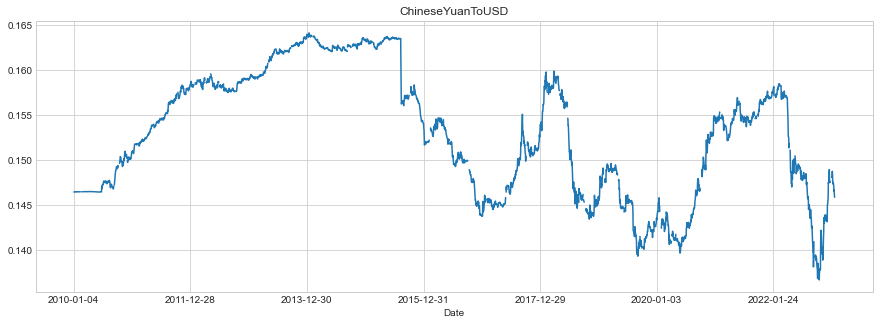

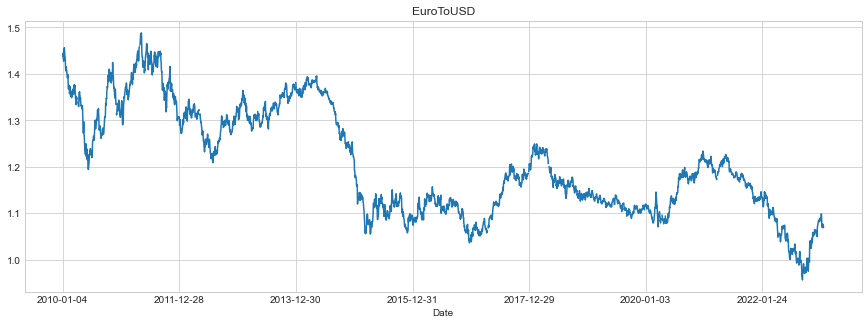

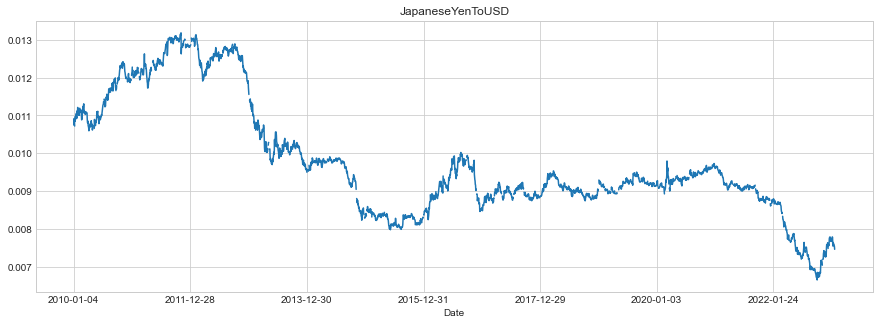

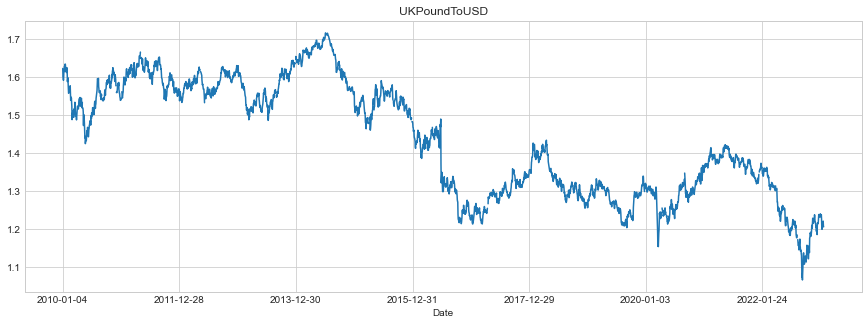

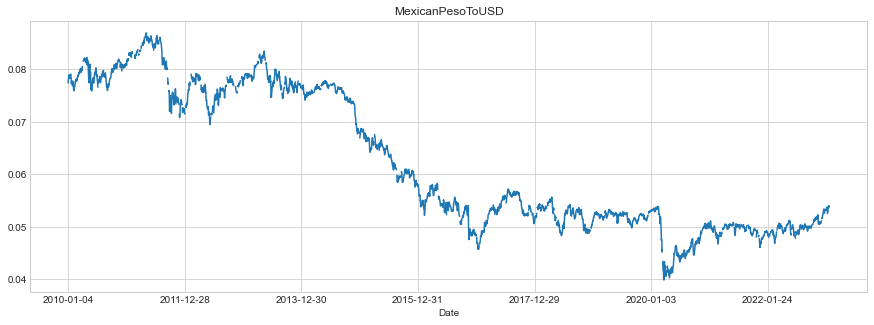

In [327]:
forex_list_to_plot = ['ChineseYuanToUSD', 
                        'EuroToUSD', 'JapaneseYenToUSD',
                        'UKPoundToUSD', 'MexicanPesoToUSD']
for forex_rate in to_usd_df.columns:
    if forex_rate in forex_list_to_plot:
        to_usd_df.set_index('Date')[forex_rate] \
                .plot(figsize=(15, 5), title=forex_rate)
    plt.show()

[GO BACK TO TOP][def]

[def]: #-Read-IMF-Exchange-Rate-Data